In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [2]:
df = pd.read_csv('./dataset.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
df = df.drop(columns=['Timestamp', 'Permissions'])

In [6]:
df.duplicated().sum()

0

In [7]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)
        
print(num_cols)
print(cat_cols)

['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects']


In [8]:
df[num_cols].describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [9]:
df.isna().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

<span style="color:blue">ini missing value handlingnya masi yg basic pake mean n mode kl mau diupdate ganti aja ya hehe</span>

In [10]:
missing_num_cols = ['Age', 'BPM']
for col in missing_num_cols:
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)

In [11]:
missing_cat_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects']
for col in missing_cat_cols:
    col_mode = df[col].mode()[0]
    df[col] = df[col].fillna(col_mode)

In [12]:
for i in cat_cols:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Primary streaming service: 6
['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service']
While working: 2
['Yes' 'No']
Instrumentalist: 2
['Yes' 'No']
Composer: 2
['Yes' 'No']
Fav genre: 16
['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
Exploratory: 2
['Yes' 'No']
Foreign languages: 2
['Yes' 'No']
Frequency [Classical]: 4
['Rarely' 'Sometimes' 'Never' 'Very frequently']
Frequency [Country]: 4
['Never' 'Sometimes' 'Very frequently' 'Rarely']
Frequency [EDM]: 4
['Rarely' 'Never' 'Very frequently' 'Sometimes']
Frequency [Folk]: 4
['Never' 'Rarely' 'Sometimes' 'Very frequently']
Frequency [Gospel]: 4
['Never' 'Sometimes' 'Rarely' 'Very frequently']
Frequency [Hip hop]: 4
['Sometimes' 'Rarely' 'Never' 'Very frequently']
Frequency [Jazz]: 4
['Never' 'Very frequently' 'Rarely' 'Sometimes']
Frequency [K pop]: 4
['Very frequently' 'Rarely' 'Sometimes

In [13]:
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
             'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
             'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
nom_cols = ['Primary streaming service','Fav genre']
bin_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

In [14]:
# Ordinal Encoding for freq_cols
freq_mapping = [["Never", "Rarely", "Sometimes", "Very frequently"]] * len(freq_cols)
ordinal_encoder = OrdinalEncoder(categories=freq_mapping)
df[freq_cols] = ordinal_encoder.fit_transform(df[freq_cols])

# Ordinal Encoding for 'Music effects'
effect_mapping = [["Worsen", "No effect", "Improve"]]
ordinal_encoder = OrdinalEncoder(categories=effect_mapping)
df['Music effects'] = ordinal_encoder.fit_transform(df[['Music effects']])

# Label Encoding for nom_cols (Nominal Columns)
label_encoder = LabelEncoder()
for col in nom_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Binary Encoding for bin_cols
bin_mapping = {"Yes": 1, "No": 0}
for col in bin_cols:
    df[col] = df[col].map(bin_mapping)

In [15]:
# df['Anxiety'] = df['Anxiety'].astype(int)
# df['Anxiety'] = (df['Anxiety'] > 5).astype(int)
target_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df[target_cols] = (1 + (df[target_cols] - 1) / 2).astype(int)

In [16]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Age: 62
[18.         63.         61.         21.         19.         25.20680272
 17.         16.         15.         14.         20.         26.
 23.         37.         36.         24.         22.         42.
 25.         32.         29.         41.         31.         33.
 30.         43.         28.         34.         13.         35.
 27.         53.         49.         60.         38.         44.
 40.         64.         56.         59.         10.         12.
 54.         57.         69.         72.         73.         39.
 58.         67.         70.         55.         48.         71.
 74.         51.         65.         80.         50.         68.
 46.         89.        ]
Primary streaming service: 6
[4 3 5 1 0 2]
Hours per day: 27
[ 3.    1.5   4.    2.5   5.    1.    6.    8.    2.   12.   24.    0.5
  0.25  0.    7.   10.    9.    0.7   4.5  20.   16.   15.   14.   13.
  0.1  11.   18.  ]
While working: 2
[1 0]
Instrumentalist: 2
[1 0]
Composer: 2
[1 0]
Fav genre: 16
[ 8 

In [17]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,3.0,2.0,3.0,0.0,2.0,2,0,1,0,2.0
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2.0,2.0,1.0,3.0,1.0,4,1,1,1,2.0
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,1.0,0.0,1.0,1.0,3.0,4,4,5,1,1.0
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2.0,2.0,0.0,0.0,0.0,5,4,2,2,2.0
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,2.0,3.0,3.0,0.0,1.0,4,1,3,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,4,2.0,1,1,0,14,1,1,120.0,...,3.0,0.0,1.0,3.0,0.0,4,3,0,5,2.0
732,18.0,4,1.0,1,1,0,11,1,1,160.0,...,3.0,0.0,0.0,2.0,2.0,2,1,1,3,2.0
733,19.0,2,6.0,1,0,1,13,1,0,120.0,...,2.0,2.0,2.0,1.0,1.0,1,1,1,1,2.0
734,19.0,4,5.0,1,1,0,0,0,0,170.0,...,0.0,0.0,0.0,0.0,2.0,1,2,1,1,2.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           736 non-null    float64
 1   Primary streaming service     736 non-null    int64  
 2   Hours per day                 736 non-null    float64
 3   While working                 736 non-null    int64  
 4   Instrumentalist               736 non-null    int64  
 5   Composer                      736 non-null    int64  
 6   Fav genre                     736 non-null    int64  
 7   Exploratory                   736 non-null    int64  
 8   Foreign languages             736 non-null    int64  
 9   BPM                           736 non-null    float64
 10  Frequency [Classical]         736 non-null    float64
 11  Frequency [Country]           736 non-null    float64
 12  Frequency [EDM]               736 non-null    float64
 13  Frequ

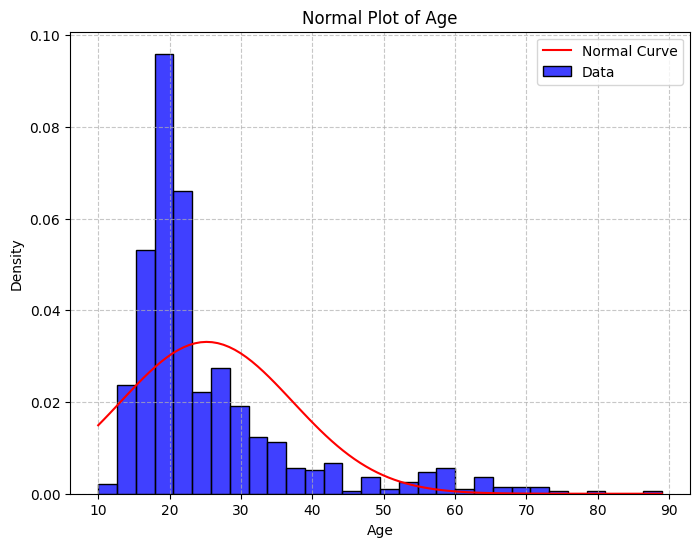

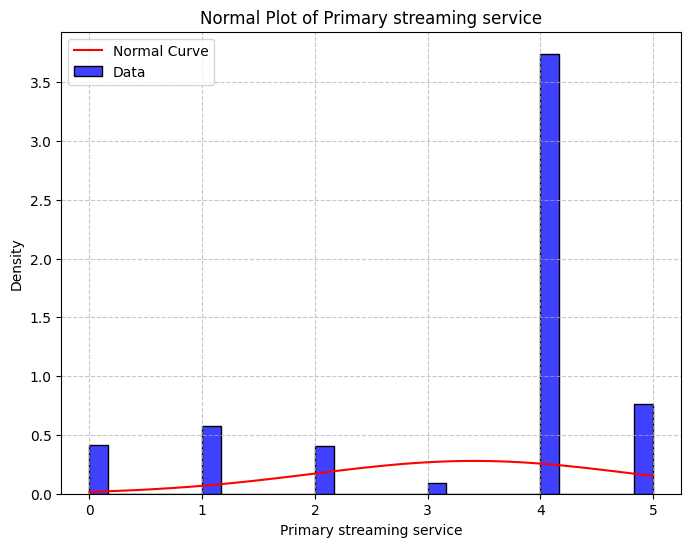

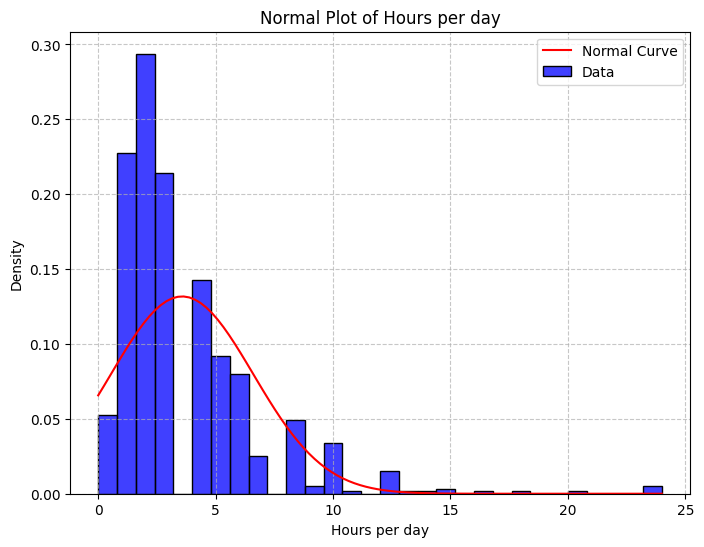

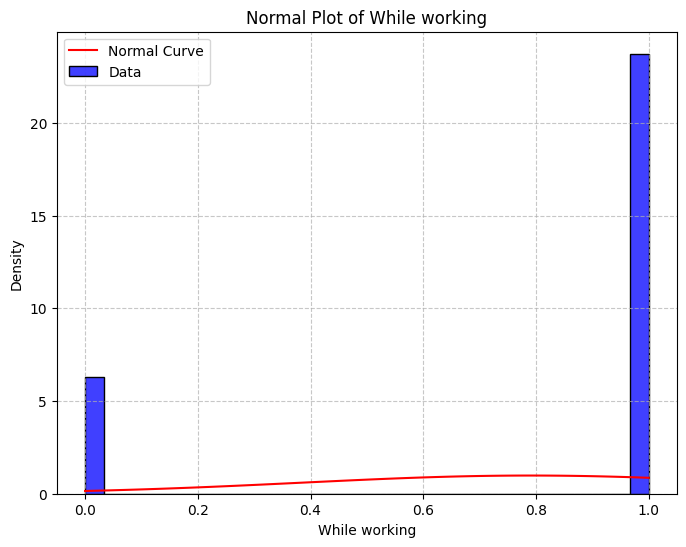

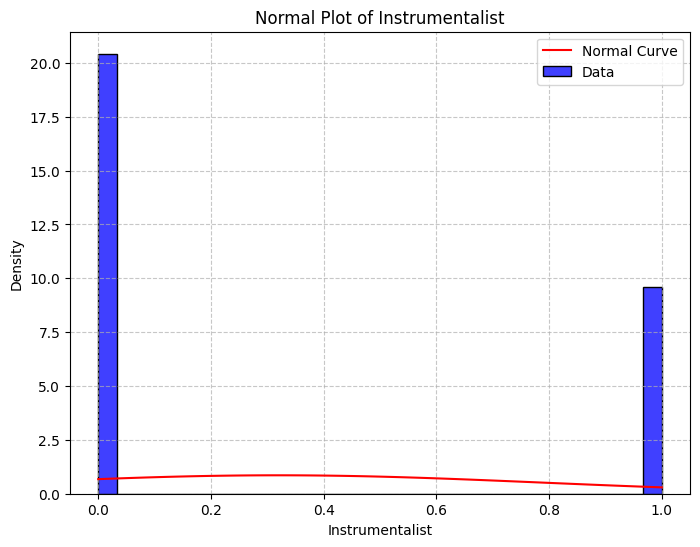

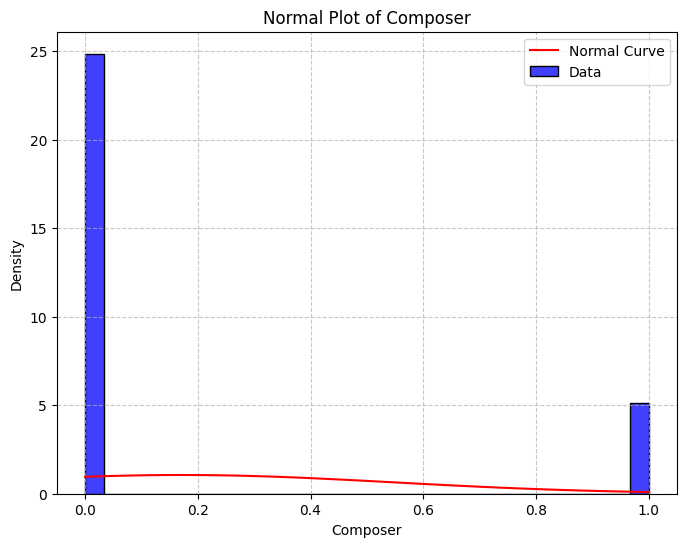

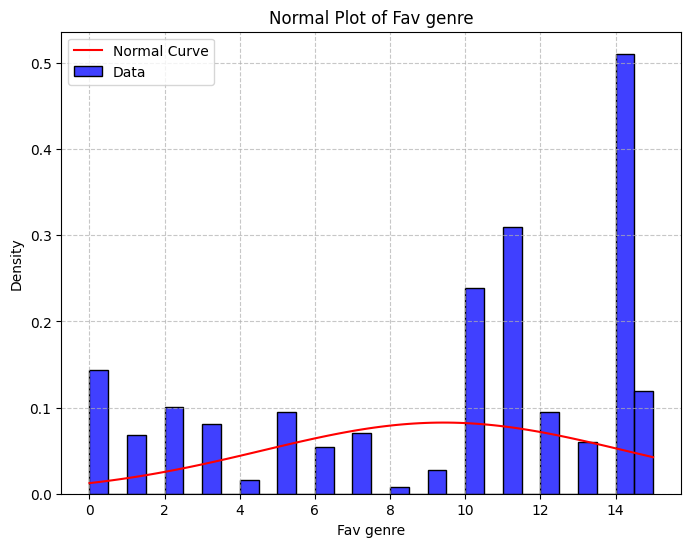

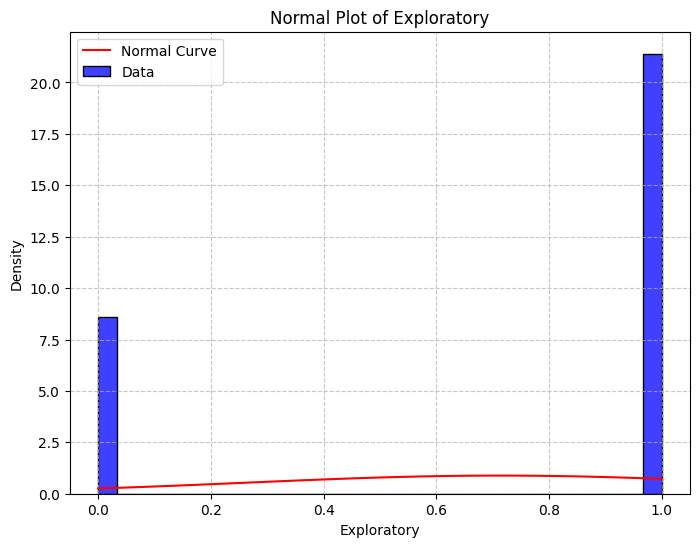

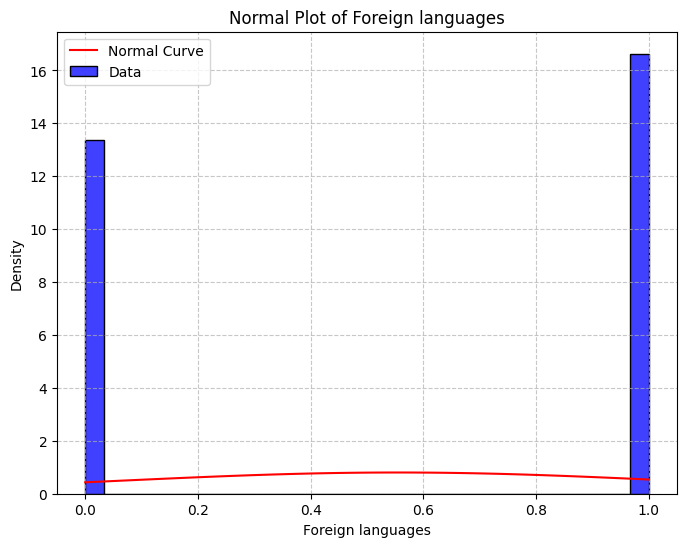

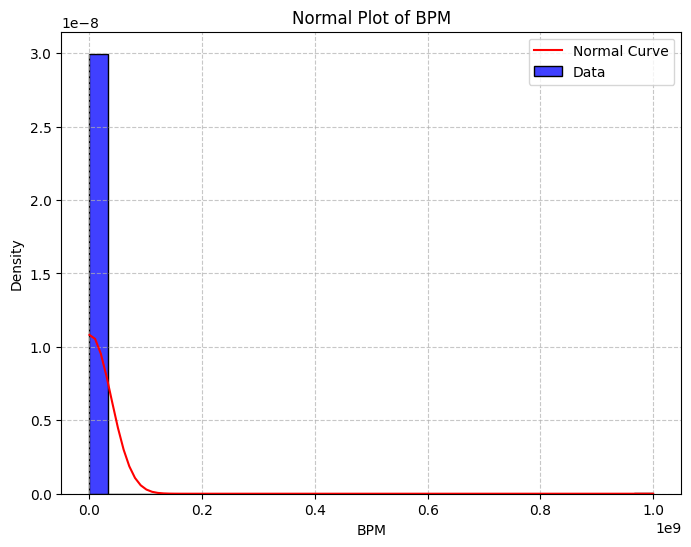

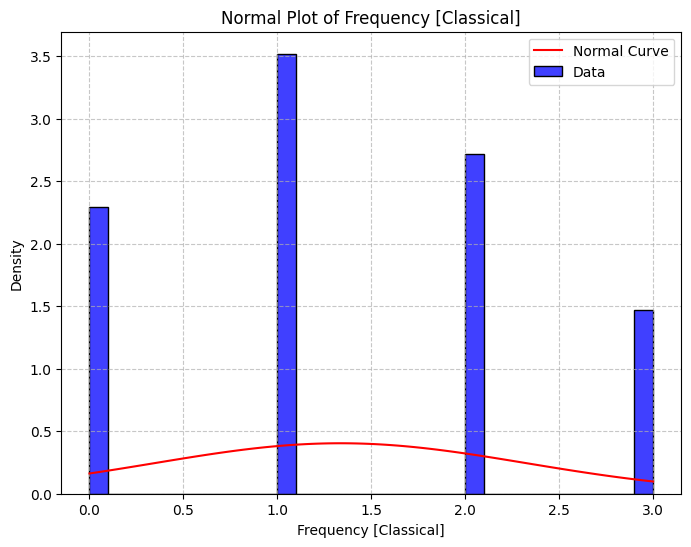

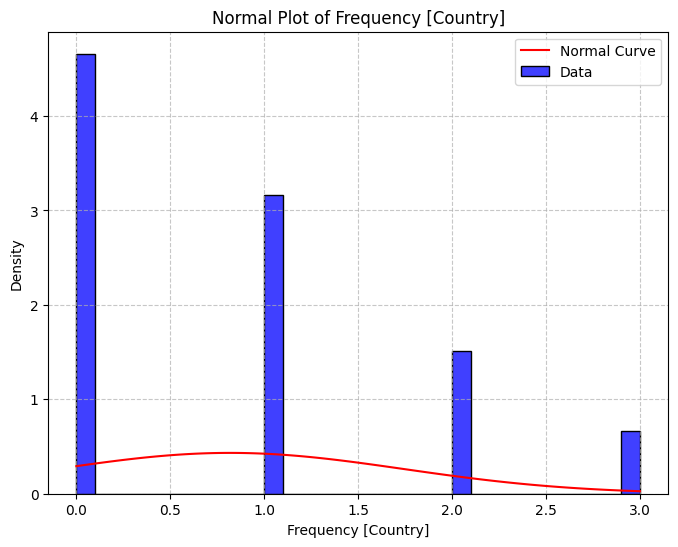

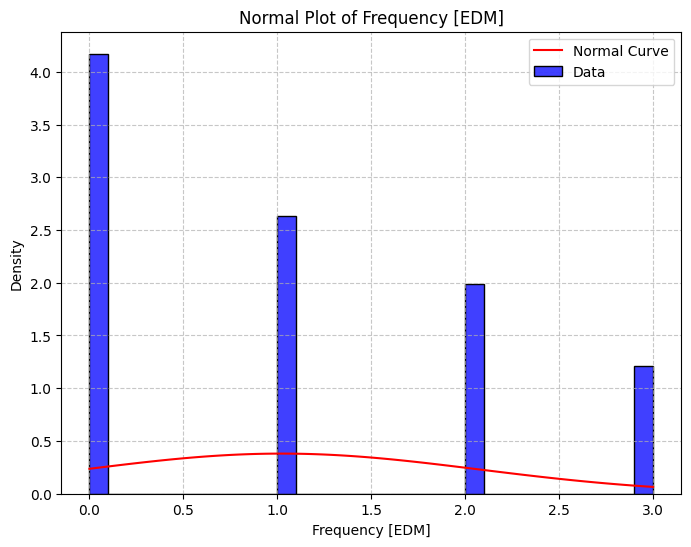

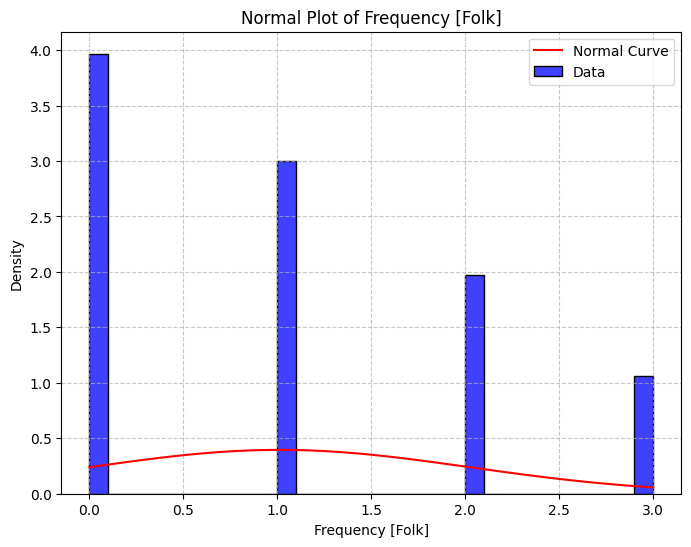

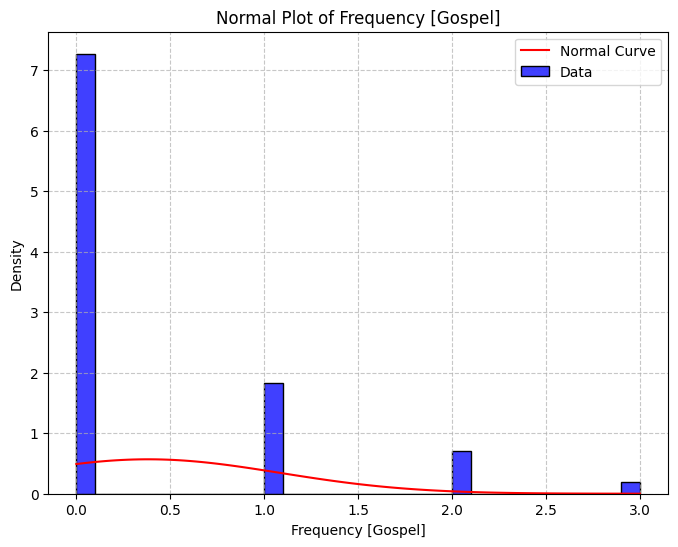

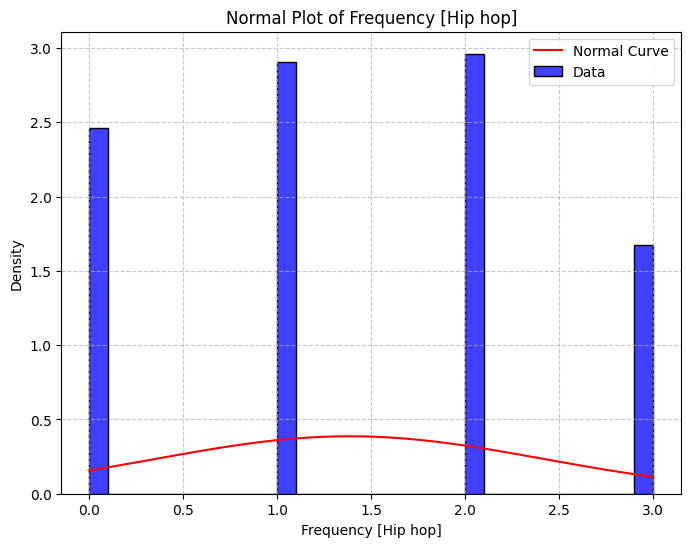

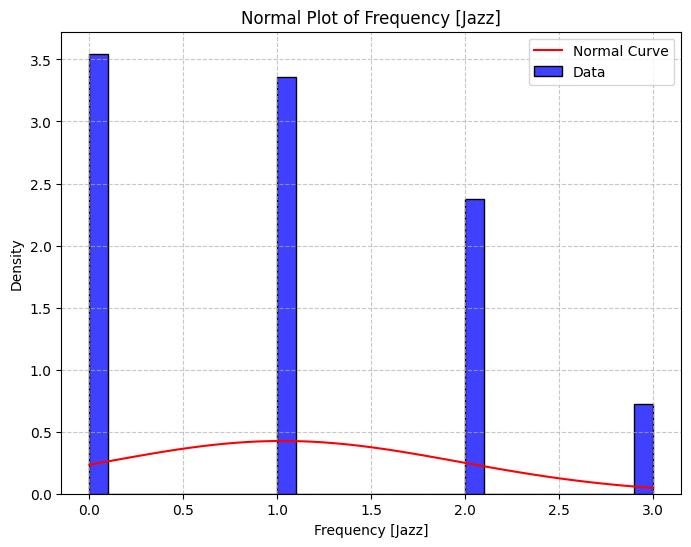

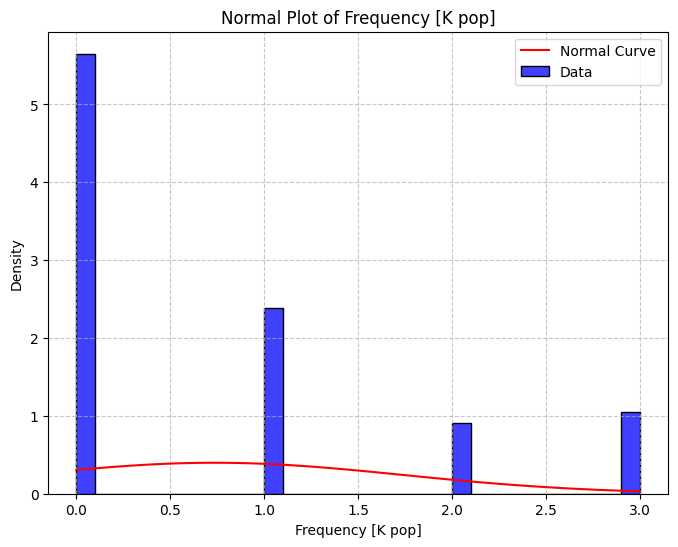

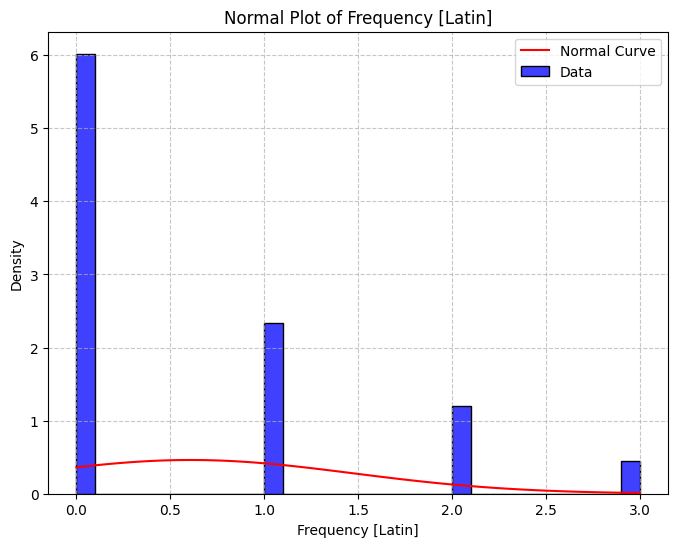

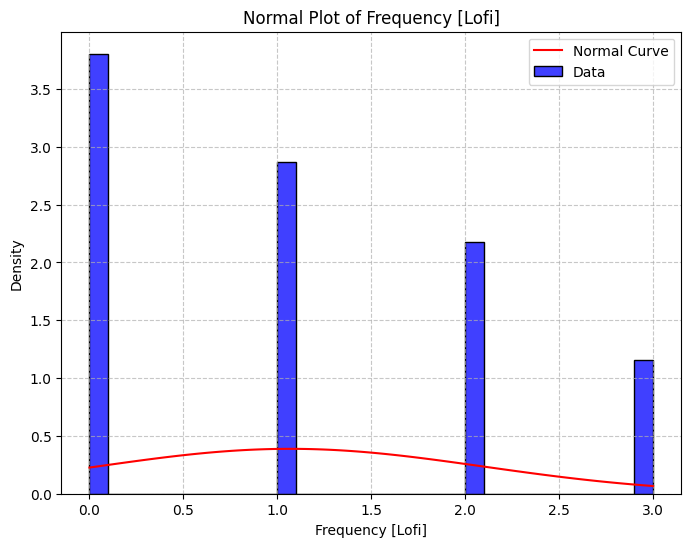

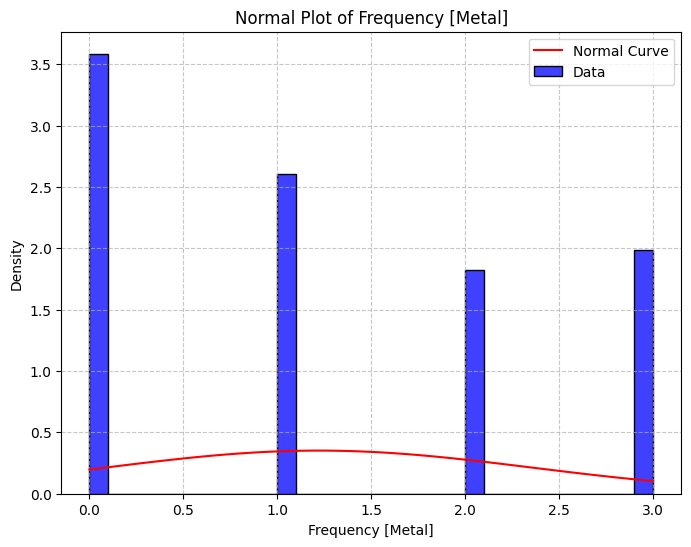

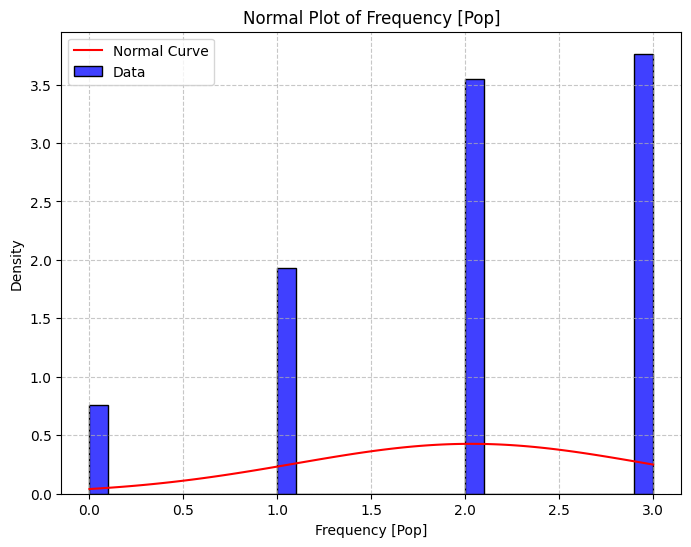

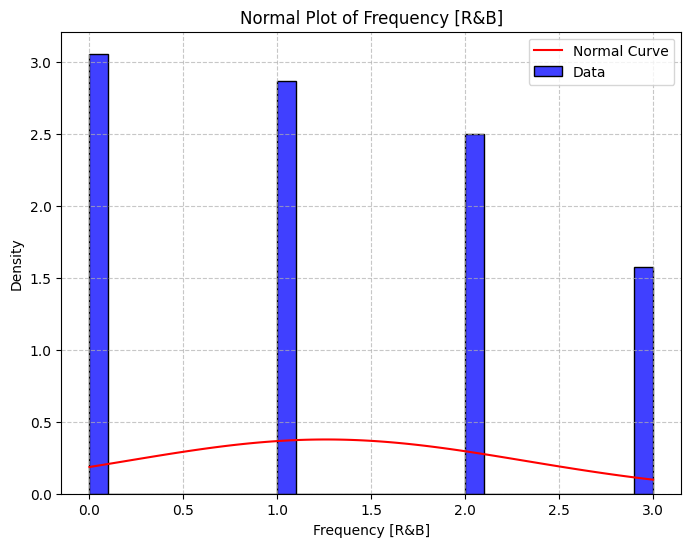

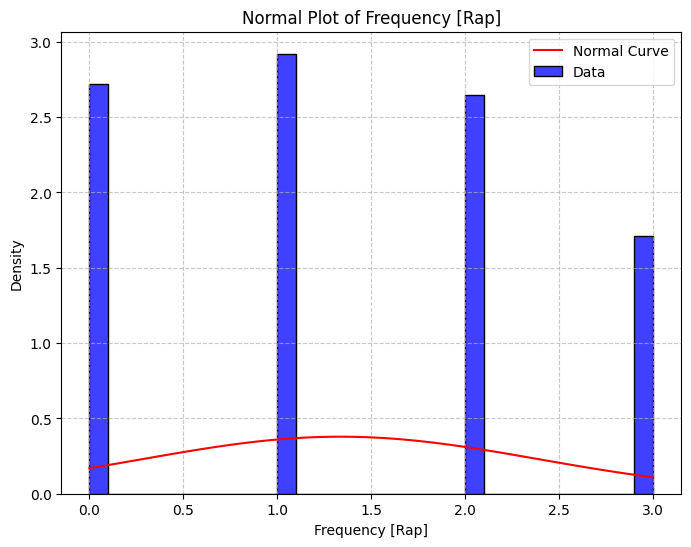

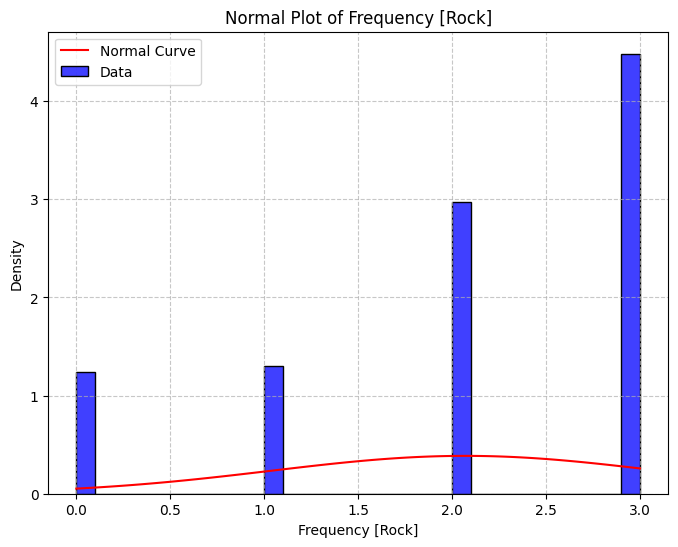

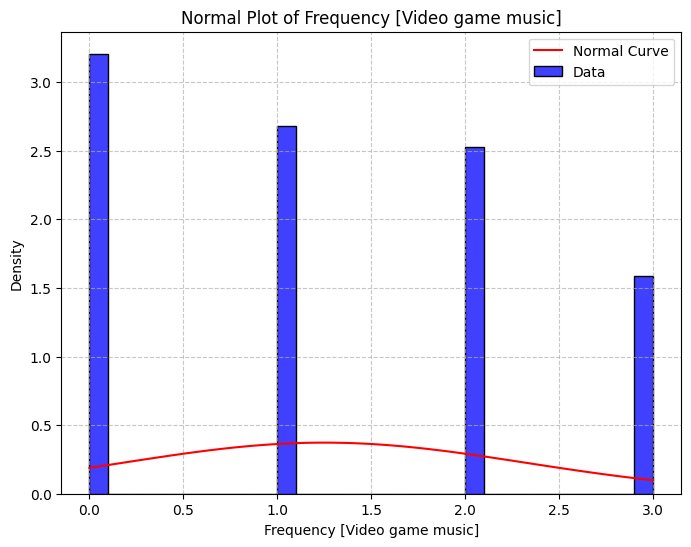

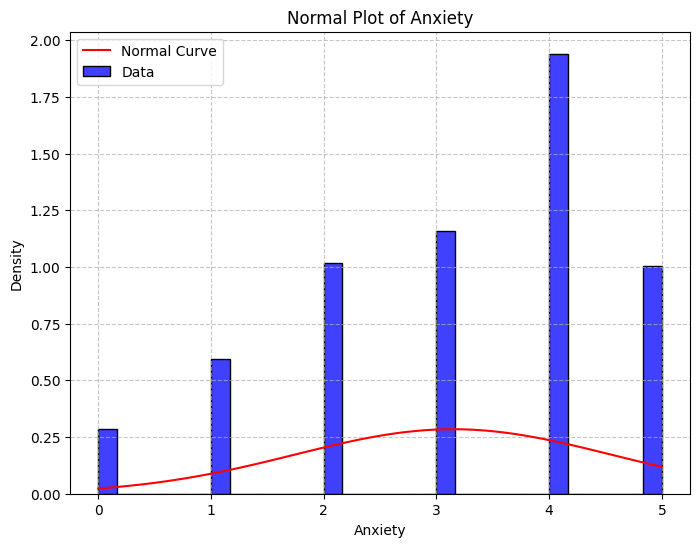

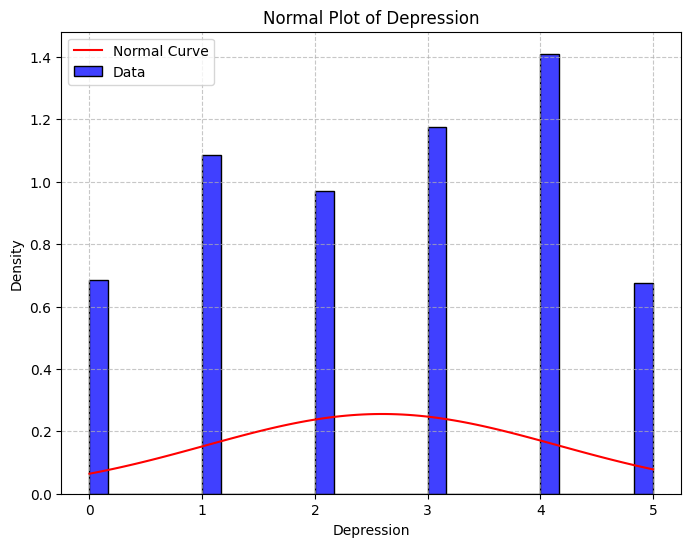

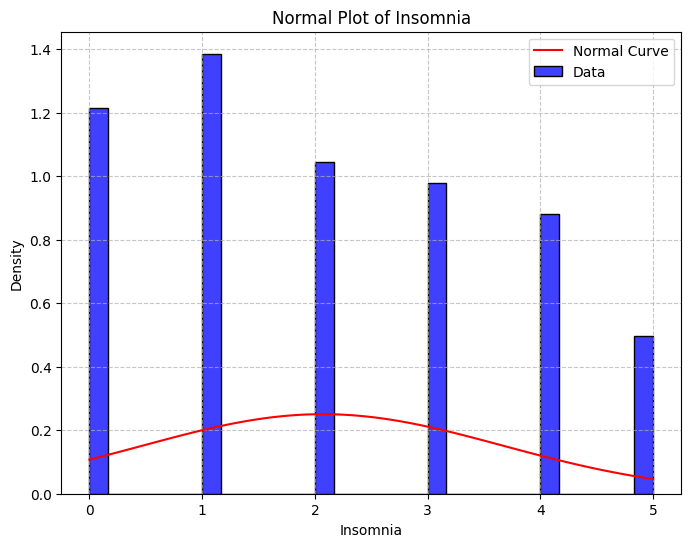

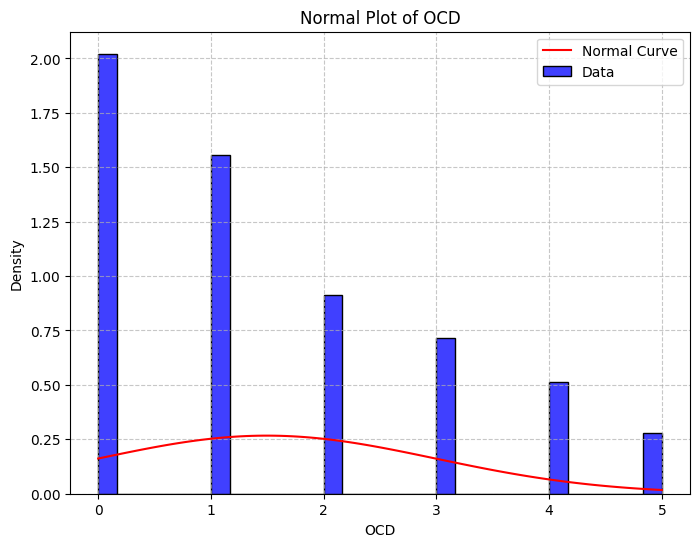

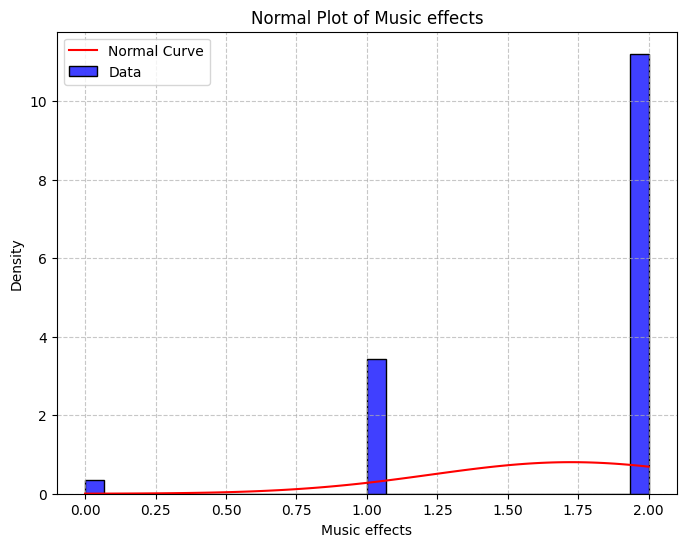

In [19]:
# Loop through each column
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        plt.figure(figsize=(8, 6))

        # Plot histogram
        sns.histplot(df[column], kde=False, color='blue', bins=30, label='Data', stat='density')

        # Overlay normal distribution
        mean = df[column].mean()
        std = df[column].std()
        x = np.linspace(df[column].min(), df[column].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal Curve')

        # Add labels and title
        plt.title(f"Normal Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

In [20]:
# df.to_csv('../dataset/final_dataset.csv', index=False)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Train-test split
X = df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis=1)
y = df['Anxiety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Train logistic regression
# model = LogisticRegression(random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:\n", cm)
# print("Classification Report:\n", report)

In [24]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        23
           4       0.36      1.00      0.53        53
           5       0.00      0.00      0.00        26

    accuracy                           0.36       148
   macro avg       0.06      0.17      0.09       148
weighted avg       0.13      0.36      0.19       148



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metr

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.25      0.20      0.22        20
           2       0.26      0.25      0.26        20
           3       0.16      0.17      0.17        23
           4       0.33      0.32      0.33        53
           5       0.19      0.23      0.21        26

    accuracy                           0.25       148
   macro avg       0.23      0.22      0.22       148
weighted avg       0.25      0.25      0.25       148

